## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

* Weight Initialization

* Nonlinearity (different Activation functions)

* Optimizers(different optimizers)

* Batch Normalization

* Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot 

### Load dataset

Fashion-MNIST dataset


In [2]:
import matplotlib.pyplot as plt
import tensorflow 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
tensorflow.__version__

'2.16.1'

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

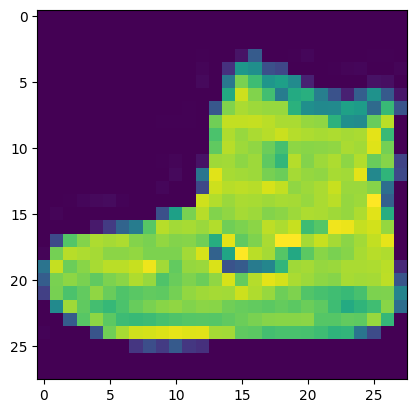

Label:  9


In [11]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])


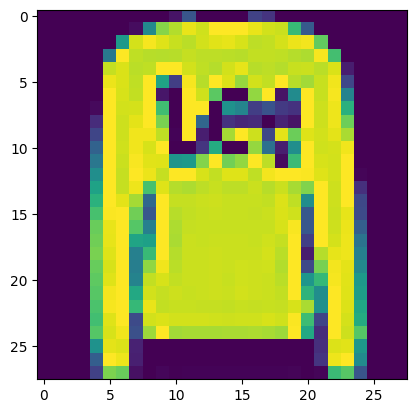

Label:  2


In [12]:
plt.imshow(X_test[1])    # show first number in the dataset
plt.show()
print('Label: ', y_test[1])

In [13]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [14]:
to_categorical(y_test)[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
X_train = X_train/255.0
X_test =X_test/255.0

In [16]:
X_train.shape

(60000, 28, 28)

### Data Pre-processing

In [17]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [18]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### Basic NN model

Naive MLP model without any alterations

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

Input -> Hidden Layer -> HL-> ---- ->OP[

In [21]:
model = Sequential()
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

C:\Users\Sandeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
60000/1875

32.0

In [24]:
history = model.fit(X_train, y_train, batch_size =200, epochs = 10, verbose = 1)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0975 - loss: 2.3704
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1003 - loss: 2.3027
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1020 - loss: 2.3025
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1074 - loss: 2.3023
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1043 - loss: 2.3021
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1110 - loss: 2.3019
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1155 - loss: 2.3016
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1221 - loss: 2.3014
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1208 - loss: 2.3012
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1222 - loss: 2.3010


In [25]:
history = model.fit(X_train, y_train, batch_size =32, epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1114 - loss: 2.3010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1185 - loss: 2.2994
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1243 - loss: 2.2963
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1472 - loss: 2.2902
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1733 - loss: 2.2763
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2599 - loss: 2.2192
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2777 - loss: 1.9280
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3542 - loss: 1.6593
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4037 - loss: 1.5135
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4644 - loss: 1.3959


In [26]:
results = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5111 - loss: 1.3354


In [27]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5108000040054321


### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

#### Zeroes

In [28]:
model = Sequential()
model.add(Dense(50, input_shape = (784, ),kernel_initializer='zeros'))
model.add(Activation('sigmoid'))
model.add(Dense(50,kernel_initializer='zeros'))
model.add(Activation('sigmoid'))
model.add(Dense(50,kernel_initializer='zeros'))
model.add(Activation('sigmoid'))
model.add(Dense(50,kernel_initializer='zeros'))
model.add(Activation('sigmoid'))
model.add(Dense(10,kernel_initializer='ones'))
model.add(Activation('softmax'))
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, verbose = 1)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1032 - loss: 2.3035
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0986 - loss: 2.3035
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1004 - loss: 2.3035
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1001 - loss: 2.3037
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1001 - loss: 2.3036
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0984 - loss: 2.3036
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0988 - loss: 2.3037
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0989 - loss: 2.3036
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0987 - loss: 2.3036
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1022 - loss: 2.3034
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0962 - loss: 2.3038
Test accuracy:  0.10000000149011612


In [41]:
model = Sequential()
model.add(Dense(50, input_shape = (784, ),kernel_initializer='ones'))
model.add(Activation('sigmoid'))
model.add(Dense(50,kernel_initializer='ones'))
model.add(Activation('sigmoid'))
model.add(Dense(50,kernel_initializer='ones'))
model.add(Activation('sigmoid'))
model.add(Dense(50,kernel_initializer='ones'))
model.add(Activation('sigmoid'))
model.add(Dense(10,kernel_initializer='ones'))
model.add(Activation('softmax'))
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, verbose = 1)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3062 - accuracy: 0.0985
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3066 - accuracy: 0.0992
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3063 - accuracy: 0.1011
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3061 - accuracy: 0.1001
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3063 - accuracy: 0.0998
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3062 - accuracy: 0.1001
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3066 - accuracy: 0.0995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3062 - accuracy: 0.1003
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3064 - accuracy: 0.1010
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 2.3054 

In [29]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [44]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=32, epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3068 - accuracy: 0.1169
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2859 - accuracy: 0.1651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2447 - accuracy: 0.2653
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0179 - accuracy: 0.3095
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6714 - accuracy: 0.3808
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4771 - accuracy: 0.4514
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3298 - accuracy: 0.5222
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2090 - accuracy: 0.5684
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1088 - accuracy: 0.5874
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.033

In [45]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.0119 - accuracy: 0.6112


In [46]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6111999750137329


In [47]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='glorot_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='glorot_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='glorot_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='glorot_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='glorot_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [48]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=32, epochs = 10, verbose = 1)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3048 - accuracy: 0.1004
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.1034
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3017 - accuracy: 0.1066
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3005 - accuracy: 0.1149
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2987 - accuracy: 0.1204
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2956 - accuracy: 0.1345
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2889 - accuracy: 0.1636
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2700 - accuracy: 0.2156
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1762 - accuracy: 0.2361
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.7223 

### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [54]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ),kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(10,kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [55]:
model = mlp_model()
history = model.fit(X_train, y_train,batch_size=32, epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7207 - accuracy: 0.7409
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4775 - accuracy: 0.8295
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4244 - accuracy: 0.8485
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3935 - accuracy: 0.8583
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8634
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3599 - accuracy: 0.8700
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3470 - accuracy: 0.8740
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8761
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3293 - accuracy: 0.8792
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.320

In [56]:
results = model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.3772 - accuracy: 0.8650


In [57]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8650000095367432


In [85]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ),kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(10,kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [86]:
model = mlp_model()
history = model.fit(X_train, y_train,batch_size=32, epochs = 10, verbose = 1)
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.8026 - accuracy: 0.6898
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7289 - accuracy: 0.7718
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5818 - accuracy: 0.8049
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5313 - accuracy: 0.8174
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4927 - accuracy: 0.8278
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4627 - accuracy: 0.8376
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4378 - accuracy: 0.8459
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4187 - accuracy: 0.8523
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4114 - accuracy: 0.8520
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.4555 

### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [42]:
from tensorflow.keras.layers import BatchNormalization, Dropout


Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [88]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ),kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    #model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50,kernel_initializer='he_normal'))
    #model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10,kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [89]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=32,epochs = 10, verbose = 1)


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5166 - accuracy: 0.8155
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3888 - accuracy: 0.8579
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3577 - accuracy: 0.8695
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3387 - accuracy: 0.8753
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3198 - accuracy: 0.8823
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.8836
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2986 - accuracy: 0.8895
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2860 - accuracy: 0.8944
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8960
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.272

In [90]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8671


In [91]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8671000003814697


### Dropout

In [99]:
def mlp_model(drop=0.2):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(drop))
    model.add(Dense(50, kernel_initializer='he_normal'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(drop))
    model.add(Dense(50, kernel_initializer='he_normal'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(drop))
    model.add(Dense(50, kernel_initializer='he_normal'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(drop))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [100]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10,batch_size=32,validation_data=(X_test, y_test), verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8491 - accuracy: 0.6799 - val_loss: 0.5109 - val_accuracy: 0.8039
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5711 - accuracy: 0.7967 - val_loss: 0.4751 - val_accuracy: 0.8233
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5204 - accuracy: 0.8165 - val_loss: 0.4362 - val_accuracy: 0.8410
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4875 - accuracy: 0.8283 - val_loss: 0.4246 - val_accuracy: 0.8477
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4710 - accuracy: 0.8348 - val_loss: 0.4351 - val_accuracy: 0.8346
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4597 - accuracy: 0.8384 - val_loss: 0.4083 - val_accuracy: 0.8513
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4468 - accuracy: 0.8424 - val_loss: 0.4016 - val_accuracy:

In [101]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4157 - accuracy: 0.8556


In [102]:
print('Test accuracy: ', results[1])


Test accuracy:  0.8555999994277954


#### Dropouts and BatchNorm

In [41]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10,batch_size=32,validation_data=(X_test, y_test), verbose = 1)
results = model.evaluate(X_test, y_test)    
print('Test accuracy: ', results[1])
            

NameError: name 'BatchNormalization' is not defined

#### Dropouts

In [105]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(50))
    model.add(Activation('relu'))    
    #model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10,batch_size=32,validation_data=(X_test, y_test), verbose = 1)
results = model.evaluate(X_test, y_test)    
print('Test accuracy: ', results[1])
            

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5753 - accuracy: 0.7914 - val_loss: 0.4406 - val_accuracy: 0.8404
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4208 - accuracy: 0.8442 - val_loss: 0.3980 - val_accuracy: 0.8536
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3878 - accuracy: 0.8572 - val_loss: 0.3902 - val_accuracy: 0.8568
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3689 - accuracy: 0.8629 - val_loss: 0.4108 - val_accuracy: 0.8529
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3543 - accuracy: 0.8690 - val_loss: 0.3566 - val_accuracy: 0.8700
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3431 - accuracy: 0.8726 - val_loss: 0.3690 - val_accuracy: 0.8666
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3317 - accuracy: 0.8765 - val_loss: 0.3582 - val_accuracy:

In [106]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(256, input_shape = (784, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128))
    model.add(Activation('relu'))    
    #model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10,batch_size=32,validation_data=(X_test, y_test), verbose = 1)
results = model.evaluate(X_test, y_test)    
print('Test accuracy: ', results[1])
            

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5215 - accuracy: 0.8122 - val_loss: 0.4156 - val_accuracy: 0.8519
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3853 - accuracy: 0.8595 - val_loss: 0.4128 - val_accuracy: 0.8519
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3557 - accuracy: 0.8704 - val_loss: 0.3780 - val_accuracy: 0.8634
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3287 - accuracy: 0.8791 - val_loss: 0.3514 - val_accuracy: 0.8706
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3141 - accuracy: 0.8834 - val_loss: 0.3421 - val_accuracy: 0.8754
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2998 - accuracy: 0.8881 - val_loss: 0.3342 - val_accuracy: 0.8838
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2874 - accuracy: 0.8937 - val_loss: 0.3333 - val_accuracy

In [44]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# fname = os.path.sep.join([args["weights"],"weights-{epoch:03d}-{val_loss:.4f}.hdf5"])
checkpoint = ModelCheckpoint("Best.weights.h5", monitor="val_loss", mode="min",save_best_only=True, verbose=1,save_weights_only=True)
callbacks = [checkpoint]

In [45]:


def mlp_model():
    model = Sequential()
    
    model.add(Dense(256, input_shape = (784, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.1))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
model = mlp_model()
history = model.fit(X_train, y_train,batch_size=32,validation_data=(X_test, y_test), epochs = 10, verbose = 1,callbacks=callbacks)
results = model.evaluate(X_test, y_test)    
print('Test accuracy: ', results[1])
           

Epoch 1/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7608 - loss: 0.6946
Epoch 1: val_loss improved from inf to 0.41781, saving model to Best.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7610 - loss: 0.6942 - val_accuracy: 0.8484 - val_loss: 0.4178
Epoch 2/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.4067
Epoch 2: val_loss improved from 0.41781 to 0.41140, saving model to Best.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8522 - loss: 0.4066 - val_accuracy: 0.8493 - val_loss: 0.4114
Epoch 3/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.3696
Epoch 3: val_loss improved from 0.41140 to 0.38635, saving model to Best.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8642 - loss: 0.3696 - val_accuracy: 0.8563 - val_loss: 0.3864
Epoch 4/10
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.3475
Epoch 4: val_loss did not improve from 0.38